In [7]:
import xarray as xr
import pandas as pd

In [8]:
file_path = f'/lustre/storeB/project/fou/hi/foccus/experiments/min-max-all-2017-24/mlflow/187656373550779284/90ed5f0579a94e1cacec799fe5fcc6f1/metrics'
mse_epoch = pd.read_csv(f'{file_path}/train_mse_loss_epoch', delim_whitespace=True, names=["idk", "idk2", "idk3"])

/tmp/ipykernel_660090/315754303.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mse_epoch = pd.read_csv(f'{file_path}/train_mse_loss_epoch', delim_whitespace=True, names=["idk", "idk2", "idk3"])


In [3]:
mse_epoch.head()
#Er det ID kjøring, MSE verdi og Step? 

,idk,idk2,idk3
0,1752216689684,0.016650,291
1,1752219046897,0.002661,583
2,1752221316396,0.000978,875
3,1752223395810,0.000602,1167
4,1752225228106,0.000497,1459


In [4]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Train MSE loss epoch')

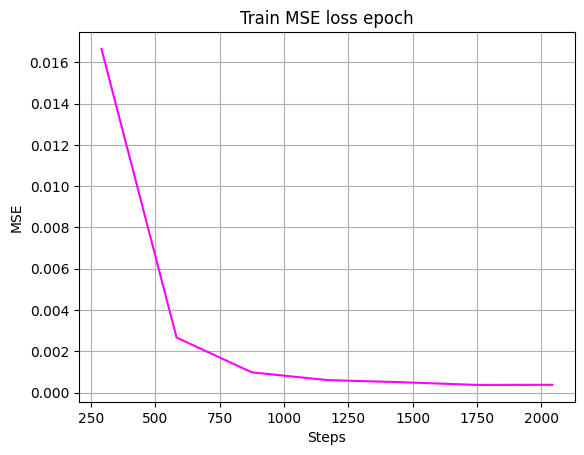

In [20]:
plt.plot(mse_epoch["idk3"],mse_epoch["idk2"], color = "magenta")
plt.grid(True)
plt.xlabel(f'Steps')
plt.ylabel(f'MSE')
plt.title("Train MSE loss epoch")

In [21]:
mse_loss_step = pd.read_csv(f'{file_path}/train_mse_loss_step', delim_whitespace=True, names=["idk", "idk2", "idk3"])
mse_loss_step.head()

/tmp/ipykernel_582026/3500774112.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mse_loss_step = pd.read_csv(f'{file_path}/train_mse_loss_step', delim_whitespace=True, names=["idk", "idk2", "idk3"])


,idk,idk2,idk3
0,1752215333743,0.002643,99
1,1752215848383,0.002059,199
2,1752216794142,0.000925,299
3,1752217587369,0.002643,399
4,1752218251203,0.002726,499


Text(0, 0.5, 'MSE')

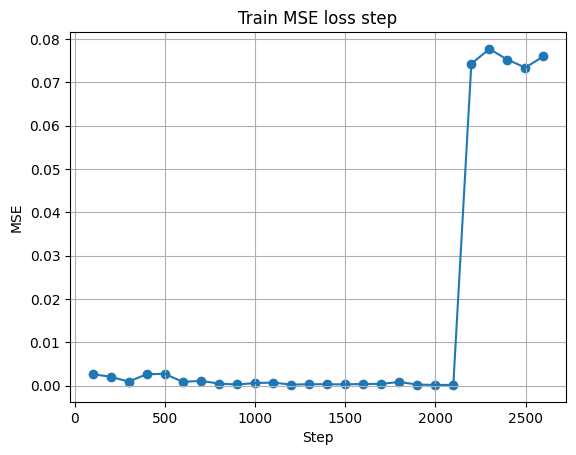

In [22]:
plt.plot(mse_loss_step["idk3"], mse_loss_step["idk2"])
plt.scatter(mse_loss_step["idk3"], mse_loss_step["idk2"])
plt.grid(True)
plt.title(f'Train MSE loss step')
plt.xlabel(f'Step')
plt.ylabel(f'MSE')

In [25]:
val_mse_loss_epoch = pd.read_csv(f'{file_path}/val_mse_loss_epoch', delim_whitespace=True, names=["idk", "idk2", "idk3"])
val_mse_loss_epoch.head()

/tmp/ipykernel_582026/3616888719.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  val_mse_loss_epoch = pd.read_csv(f'{file_path}/val_mse_loss_epoch', delim_whitespace=True, names=["idk", "idk2", "idk3"])


,idk,idk2,idk3
0,1752216668811,0.002864,291
1,1752219030941,0.002025,583
2,1752221295981,0.000702,875
3,1752223375238,0.000327,1167
4,1752225215402,0.000346,1459


Text(0, 0.5, 'MSE')

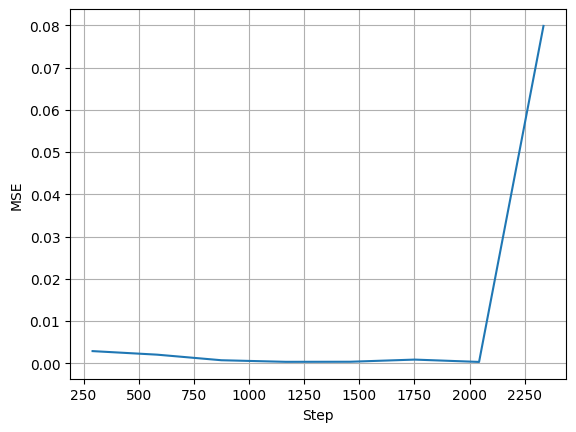

In [27]:
plt.plot(val_mse_loss_epoch["idk3"], val_mse_loss_epoch["idk2"])
plt.grid(True)
plt.xlabel(f'Step')
plt.ylabel(f'MSE')

In [37]:
import os
import matplotlib.pyplot as plt

In [9]:
try:
    filenames = os.listdir(file_path)
    for filename in filenames:
        print(filename)
except FileNotFoundError:
    print(f'Folder not found')

train_mse_loss_step
train_mse_loss_epoch
epoch
lr-AdamW
val_mse_inside_lam_metric
val_mse_loss_epoch
rollout
.train_mse_loss_epoch.swp
val_mse_loss_step


In [156]:
def mlflow_subs(dir_in):
    fig, ax = plt.subplots(9, figsize = (10,15))
    filenames = os.listdir(dir_in)
    print(filenames)
    for i, filename in enumerate(filenames):
        file_path = os.path.join(dir_in, filename)
        if os.path.isdir(file_path):
            continue
        if filename.endswith(".swp"):
            continue

        if i >= len(ax):
            print(f'Files after {len(ax)} are skipped in subplot. Increase amount of subplots to include more files')
            break
        #Skip the rest of the files if it exceeds the number of subplots
        else:
            try:
                ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])
                print(f'Successfully read in {filename}. Directories and .swp files are ignored.')
                print(f'Start of data: {ds.head()}')
                ax[i].plot(ds["Step"], ds["Vals"])
                ax[i].scatter(ds["Step"], ds["Vals"], s = 6)
                ax[i].grid(True)
                ax[i].set_xlabel("Step")
                ax[i].set_title(f'{filename}')
            except Exception as e:
                print(f'Could not read in {filename} using Pandas: {e}')
                continue 
    plt.suptitle(f'Min-max-all-2017-24')
    plt.tight_layout()
    plt.show()


['train_mse_loss_step', 'train_mse_loss_epoch', 'epoch', 'lr-AdamW', 'val_mse_inside_lam_metric', 'val_mse_loss_epoch', 'rollout', '.train_mse_loss_epoch.swp', 'val_mse_loss_step']
Successfully read in train_mse_loss_step. Directories and .swp files are ignored.
Start of data:               ID      Vals  Step
0  1752215333743  0.002643    99
1  1752215848383  0.002059   199
2  1752216794142  0.000925   299
3  1752217587369  0.002643   399
4  1752218251203  0.002726   499
Successfully read in train_mse_loss_epoch. Directories and .swp files are ignored.
Start of data:               ID      Vals  Step
0  1752216689684  0.016650   291
1  1752219046897  0.002661   583
2  1752221316396  0.000978   875
3  1752223395810  0.000602  1167
4  1752225228106  0.000497  1459
Successfully read in epoch. Directories and .swp files are ignored.
Start of data:               ID  Vals  Step
0  1752215333743   0.0    99
1  1752215848383   0.0   199
2  1752216668811   0.0   291
3  1752216689684   0.0   291


/tmp/ipykernel_660090/1265649503.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])
/tmp/ipykernel_660090/1265649503.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])
/tmp/ipykernel_660090/1265649503.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])
/tmp/ipykernel_660090/1265649503.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = p

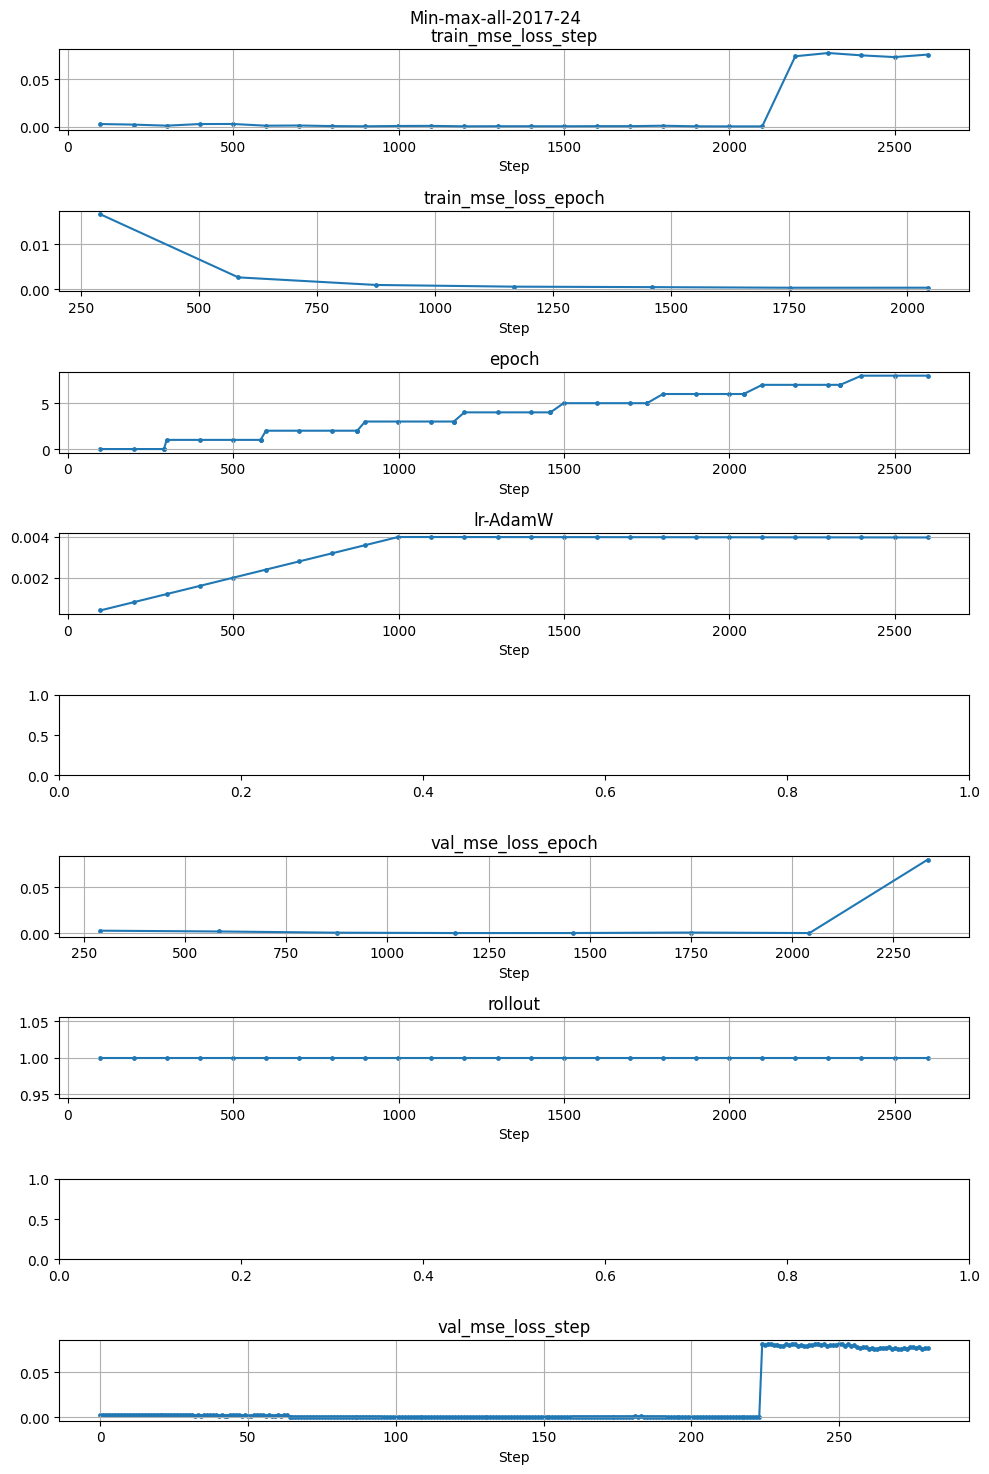

In [157]:
mlflow_subs('/lustre/storeB/project/fou/hi/foccus/experiments/min-max-all-2017-24/mlflow/187656373550779284/90ed5f0579a94e1cacec799fe5fcc6f1/metrics')

In [154]:
def single_plots_mlflow(dir_in):
    filenames = os.listdir(dir_in)
    for i, filename in enumerate(filenames):
        file_path = os.path.join(dir_in, filename)
        if os.path.isdir(file_path):
            continue

        if filename.endswith(".swp"):
            continue
        else:
            try:
                ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])
                print(f'Successfully read in {filename}. Directories and .swp files are ignored.')
                print(f'Start of data: {ds.head()}')
            except Exception as e:
                print(f'Could not read in {filename} using Pandas: {e}')
                continue
        
        plt.plot(ds["Step"], ds["Vals"])
        plt.scatter(ds["Step"], ds["Vals"], s = 6)
        plt.grid(True)
        plt.xlabel("Step")
        plt.title(f'{filename}')
        plt.tight_layout()
        plt.show()

Successfully read in train_mse_loss_step. Directories and .swp files are ignored.
Start of data:               ID      Vals  Step
0  1752215333743  0.002643    99
1  1752215848383  0.002059   199
2  1752216794142  0.000925   299
3  1752217587369  0.002643   399
4  1752218251203  0.002726   499


/tmp/ipykernel_660090/4094701388.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


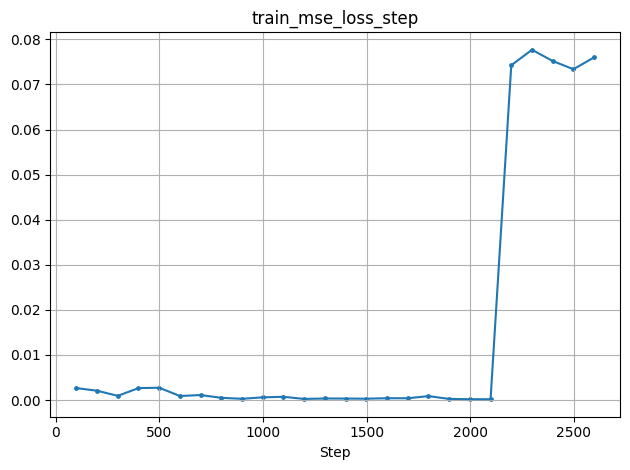

Successfully read in train_mse_loss_epoch. Directories and .swp files are ignored.
Start of data:               ID      Vals  Step
0  1752216689684  0.016650   291
1  1752219046897  0.002661   583
2  1752221316396  0.000978   875
3  1752223395810  0.000602  1167
4  1752225228106  0.000497  1459


/tmp/ipykernel_660090/4094701388.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


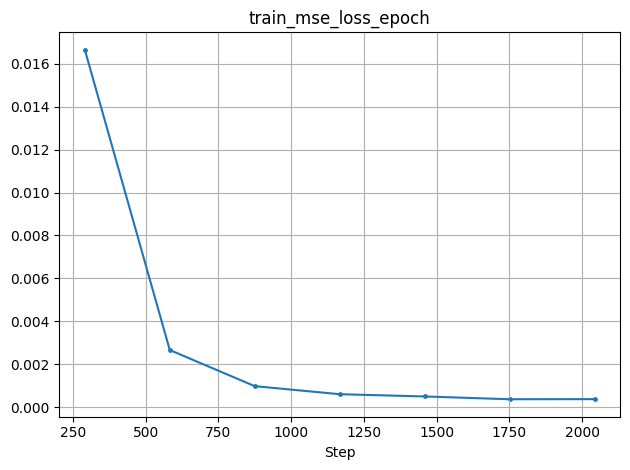

/tmp/ipykernel_660090/4094701388.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


Successfully read in epoch. Directories and .swp files are ignored.
Start of data:               ID  Vals  Step
0  1752215333743   0.0    99
1  1752215848383   0.0   199
2  1752216668811   0.0   291
3  1752216689684   0.0   291
4  1752216794142   1.0   299


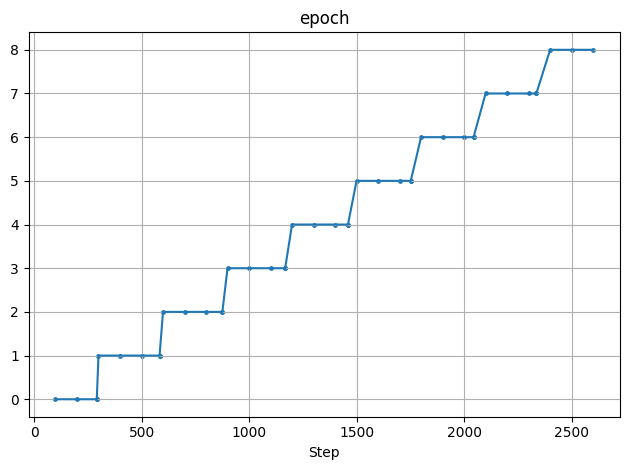

/tmp/ipykernel_660090/4094701388.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


Successfully read in lr-AdamW. Directories and .swp files are ignored.
Start of data:               ID      Vals  Step
0  1752215325733  0.000396    99
1  1752215840428  0.000796   199
2  1752216788922  0.001196   299
3  1752217583755  0.001596   399
4  1752218248633  0.001996   499


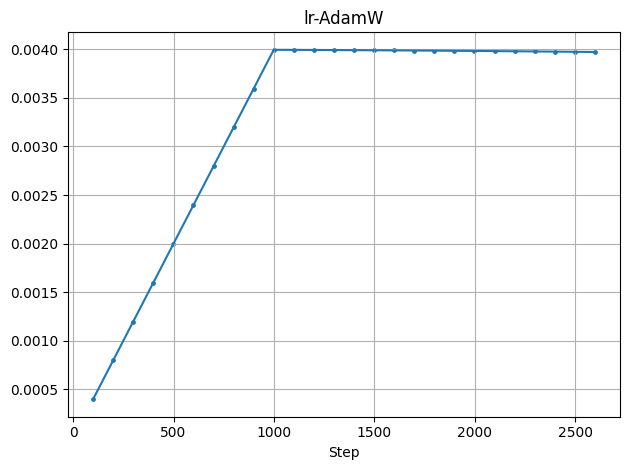

/tmp/ipykernel_660090/4094701388.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


Successfully read in val_mse_loss_epoch. Directories and .swp files are ignored.
Start of data:               ID      Vals  Step
0  1752216668811  0.002864   291
1  1752219030941  0.002025   583
2  1752221295981  0.000702   875
3  1752223375238  0.000327  1167
4  1752225215402  0.000346  1459


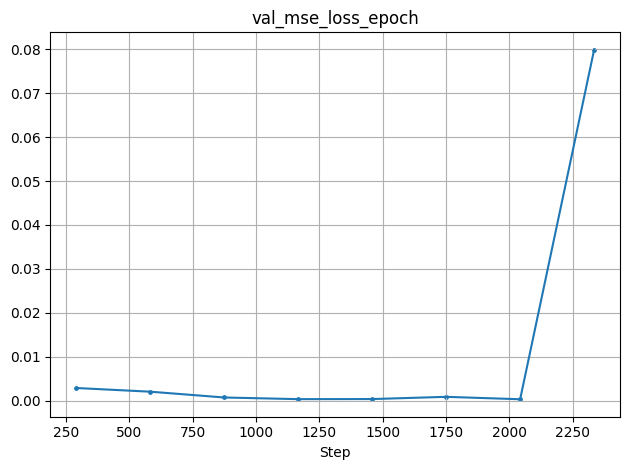

/tmp/ipykernel_660090/4094701388.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


Successfully read in rollout. Directories and .swp files are ignored.
Start of data:               ID  Vals  Step
0  1752215333743   1.0    99
1  1752215848383   1.0   199
2  1752216794142   1.0   299
3  1752217587369   1.0   399
4  1752218251203   1.0   499


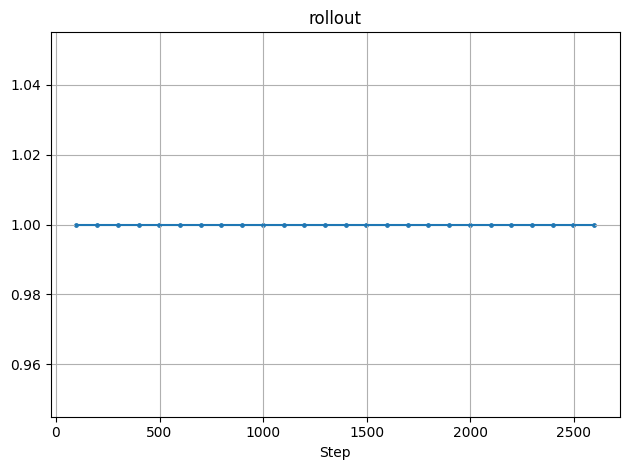

/tmp/ipykernel_660090/4094701388.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


Successfully read in val_mse_loss_step. Directories and .swp files are ignored.
Start of data:               ID      Vals  Step
0  1752216503180  0.002804     0
1  1752216513631  0.002809     1
2  1752216514103  0.002837     2
3  1752216523645  0.002800     3
4  1752216524119  0.002940     4


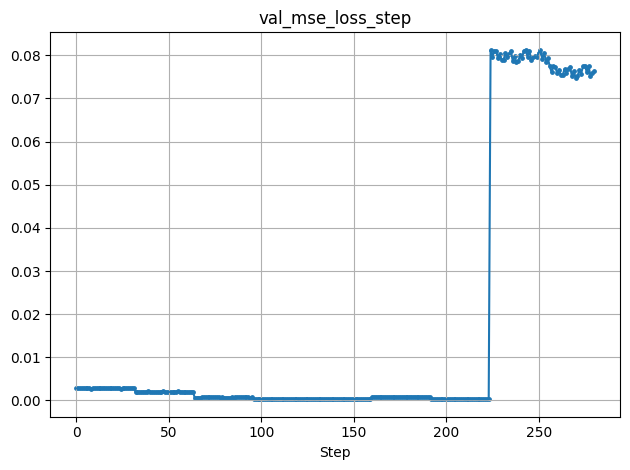

In [155]:
single_plots_mlflow('/lustre/storeB/project/fou/hi/foccus/experiments/min-max-all-2017-24/mlflow/187656373550779284/90ed5f0579a94e1cacec799fe5fcc6f1/metrics')

Successfully read in train_mse_loss_step. Directories and .swp files are ignored.
Start of data:               ID      Vals  Step
0  1752215333743  0.002643    99
1  1752215848383  0.002059   199
2  1752216794142  0.000925   299
3  1752217587369  0.002643   399
4  1752218251203  0.002726   499


/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/mlflow__func.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


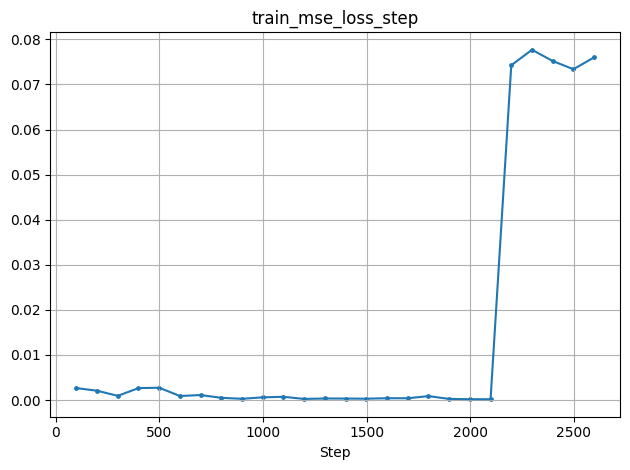

Successfully read in train_mse_loss_epoch. Directories and .swp files are ignored.
Start of data:               ID      Vals  Step
0  1752216689684  0.016650   291
1  1752219046897  0.002661   583
2  1752221316396  0.000978   875
3  1752223395810  0.000602  1167
4  1752225228106  0.000497  1459


/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/mlflow__func.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


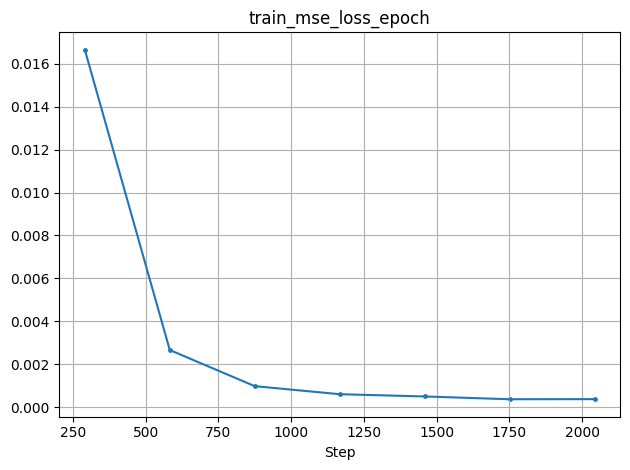

/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/mlflow__func.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


Successfully read in epoch. Directories and .swp files are ignored.
Start of data:               ID  Vals  Step
0  1752215333743   0.0    99
1  1752215848383   0.0   199
2  1752216668811   0.0   291
3  1752216689684   0.0   291
4  1752216794142   1.0   299


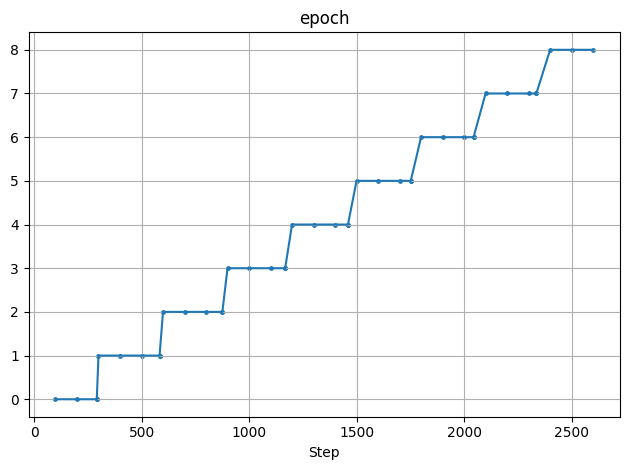

/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/mlflow__func.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


Successfully read in lr-AdamW. Directories and .swp files are ignored.
Start of data:               ID      Vals  Step
0  1752215325733  0.000396    99
1  1752215840428  0.000796   199
2  1752216788922  0.001196   299
3  1752217583755  0.001596   399
4  1752218248633  0.001996   499


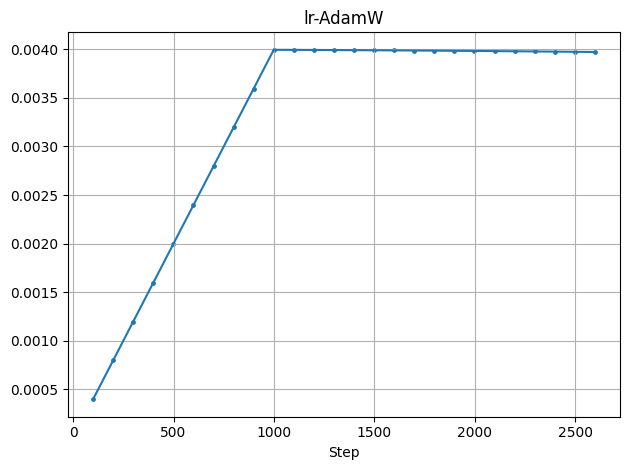

/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/mlflow__func.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


Successfully read in val_mse_loss_epoch. Directories and .swp files are ignored.
Start of data:               ID      Vals  Step
0  1752216668811  0.002864   291
1  1752219030941  0.002025   583
2  1752221295981  0.000702   875
3  1752223375238  0.000327  1167
4  1752225215402  0.000346  1459


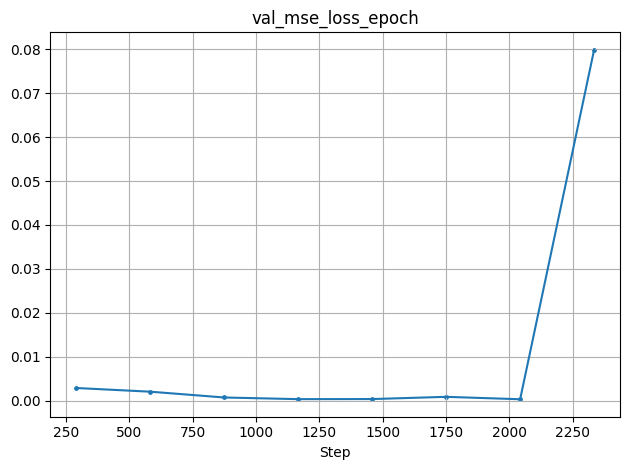

/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/mlflow__func.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


Successfully read in rollout. Directories and .swp files are ignored.
Start of data:               ID  Vals  Step
0  1752215333743   1.0    99
1  1752215848383   1.0   199
2  1752216794142   1.0   299
3  1752217587369   1.0   399
4  1752218251203   1.0   499


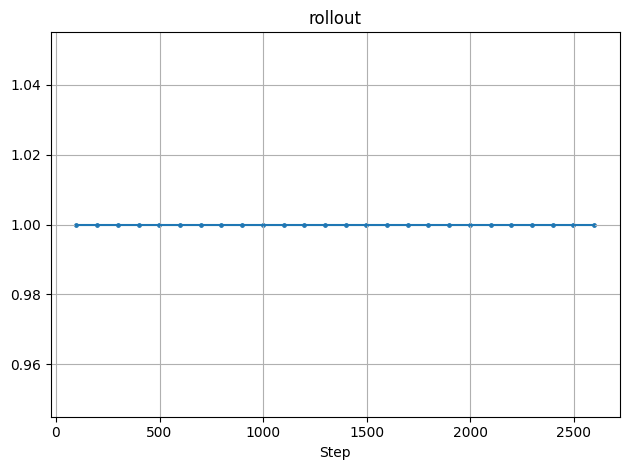

/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/mlflow__func.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ds = pd.read_csv(f'{file_path}', delim_whitespace=True, names=["ID", "Vals", "Step"])


Successfully read in val_mse_loss_step. Directories and .swp files are ignored.
Start of data:               ID      Vals  Step
0  1752216503180  0.002804     0
1  1752216513631  0.002809     1
2  1752216514103  0.002837     2
3  1752216523645  0.002800     3
4  1752216524119  0.002940     4


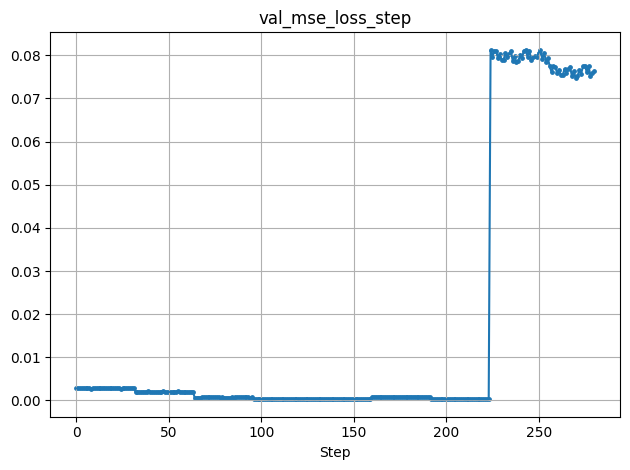

In [159]:
from mlflow__func import single_plots_mlflow
single_plots_mlflow('/lustre/storeB/project/fou/hi/foccus/experiments/min-max-all-2017-24/mlflow/187656373550779284/90ed5f0579a94e1cacec799fe5fcc6f1/metrics')
    

The variables in the mlflow environment are lacking values. Not quite sure what to plot. 